# Stock Performance Clustering

The notebook below will perform a quick EDA on various companies stock performance and then use the data to cluster companies using their daily stock price movements (i.e., the dollar difference between the opening and closing prices for each trading day). Daily opening and closing prices consist of data from 2010 to 2015, where each row corresponds to a company and each column corresponds to a trading day.

The goal of the clustering algorithm will be to obtain 15 or less clusters.

## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movements = pd.read_csv("datasets/movement.csv",header=None)
movements

,0,1,2,3,4,5,6,7,8,9,...,953,954,955,956,957,958,959,960,961,962
0,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
5,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,-0.379999,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
6,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,-0.150002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
7,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,-0.130001,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
8,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,-1.330002,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996
9,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,-0.540001,...,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003,1.050003


In [3]:
# List out companies included in the data
companies = ['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'ConocoPhillips',
 'Cisco',
 'Chevron',
 'DuPont de Nemours',
 'Dell',
 'Ford',
 'General Electrics',
 'Google/Alphabet',
 'Goldman Sachs',
 'GlaxoSmithKline',
 'Home Depot',
 'Honda',
 'HP',
 'IBM',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Kimberly-Clark',
 'Coca Cola',
 'Lookheed Martin',
 'MasterCard',
 'McDonalds',
 '3M',
 'Microsoft',
 'Mitsubishi',
 'Navistar',
 'Northrop Grumman',
 'Novartis',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Philip Morris',
 'Royal Dutch Shell',
 'SAP',
 'Schlumberger',
 'Sony',
 'Sanofi-Aventis',
 'Symantec',
 'Toyota',
 'Total',
 'Taiwan Semiconductor Manufacturing',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox',
 'Yahoo']

In [4]:
len(companies)

60

## Exploratory Data Analysis

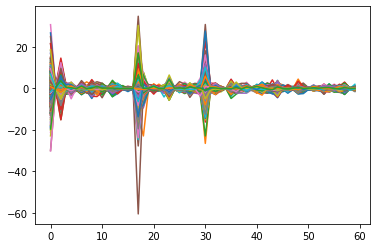

In [6]:
# Companies stock price movements - very ugly, not very imformative
movements.plot(legend=False)
plt.show()

In [7]:
# Transpose the table so the companies are columns and days are rows
movements_tr = movements.transpose()
movements_tr.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.580000,-0.640002,-2.350006,0.109997,0.459999,0.450000,0.180000,0.730000,0.899997,0.360000,...,0.09,-0.190001,0.060001,0.640002,0.290001,0.300000,0.489998,0.430001,0.09,0.159999
1,-0.220005,-0.650000,1.260009,0.000000,1.770000,0.460001,0.220001,0.369999,0.700001,0.909996,...,-0.07,-0.090000,-0.039997,0.230002,-0.099998,0.800000,-0.400001,0.229996,0.01,0.010001
2,-3.409998,-0.210001,-2.350006,0.260002,1.549999,0.180000,0.040001,-0.099999,0.250000,-0.290001,...,-0.07,-0.230000,0.140001,0.419999,0.560001,0.080000,0.070000,0.570000,-0.08,0.000000
3,-1.170000,-0.420000,-2.009995,0.720002,2.690003,0.250000,0.250000,-0.169999,0.369999,-0.059998,...,-0.30,0.150000,-0.010000,0.170007,0.250000,1.009998,-0.120003,-0.099999,0.07,-0.109998
4,1.680011,0.710001,2.960006,0.190003,0.059997,-0.199999,-0.360001,0.030003,1.090000,1.300003,...,-0.04,0.740000,0.180000,-0.239991,0.070004,-0.039999,-0.099998,-0.170005,-0.01,0.020001


<AxesSubplot:>

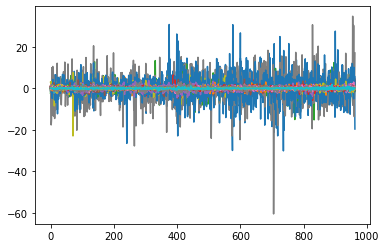

In [18]:
# replot the data
movements_tr.plot(legend=False)

Both graphs above are difficult to read, so random columns (i.e., companies will be selected) to plot the data.

In [8]:
import random
random.sample(range(0, 59), 6)

[32, 11, 35, 58, 55, 47]

<AxesSubplot:>

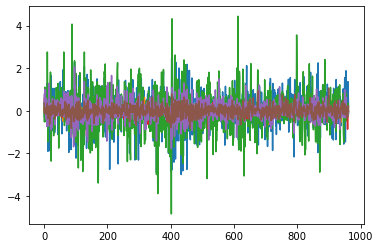

In [9]:
selected_companies = movements_tr[[32, 11, 35, 58, 55, 47]]
selected_companies.plot(legend=False)

Looking at the two graphs, it appears most companies' stock price movements stay between 1 and -1. In other words change about $1.00/day.

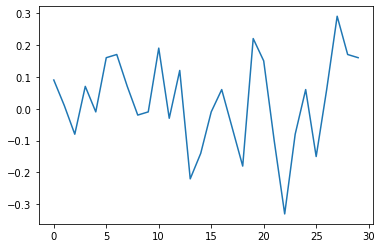

In [10]:
# Review this theory in more detail by just picking one company
plt.plot(selected_companies[58][0:30])

## KMeans Clustering Algorithm
A KMeans Clustering Algorithm will be used given the goal is to have under 15 clusters. The visualizes help give some sense of the data as well - while there are some outliers, the data overall is not too noisy. KMeans should work well with data that is not too noisy. Scaling the data in this regard will help as well.

<AxesSubplot:>

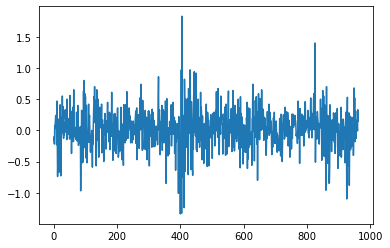

In [11]:
# The data should be scaled prior to modeling as the movements vary greatly for each company. See below graph as example:
movements_tr[19].plot(legend=False)

In [25]:
# The data will be scaled because features have different ranges (i.e. stocks are based off different values)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()

kmeans = KMeans(n_clusters=12, max_iter=500, n_init=5, random_state=42)

pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(movements)
labels = pipeline.predict(movements)

In [26]:
# Assign companies name based on companies list above
df = pd.DataFrame({'label':labels, 'company':list(companies)}).sort_values(by=['label'], axis=0)
df

,label,company
27,0,Kimberly-Clark
9,0,Colgate-Palmolive
0,1,Apple
30,2,MasterCard
17,3,Google/Alphabet
2,4,Amazon
36,5,Northrop Grumman
29,5,Lookheed Martin
4,5,Boeing
18,6,Goldman Sachs


The output above indicates 11 total clusters were produced by the algorithm. See below for results analysis.

## Identified Clusters
1. Cluster #5 contains 3 companies: Northrop Grumman, Lockheed Martin, and Boeing. These are 3 companies in the aerospace industry; thus, it is rationale they are in the same cluster
2. Cluster #7 contains 3M and Catepillar. Catepillar is a construction machinary company, and while 3M makes various products, a large portion of their business is in construction. Thus, it is also rationale they are grouped together.
3. Cluster #11 contains Cheveron, ConocoPhillips, and Exxon, which are all oil/gas companies.

Overall the algorithm performed okay. There are several distinct clusters; however, cluster 10 is made up of various companies all within different industries. By further altering the hyperparameters of the algorithm, it possible more distinct clusters can be achieved.